In [6]:
!pip3 install shap


In [3]:
# we take the coalifornia housing dataset present in the scikit-learnn library

In [7]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#California Jousing prices
dataset = fetch_california_housing(as_frame= True)
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
#Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
#Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
# fits the explainer
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)


ExactExplainer explainer:  14%|█▍        | 574/4128 [05:18<32:52,  1.80it/s]


KeyboardInterrupt: 

In [ ]:
# Evaluate SHAP values
shap_values

In [5]:
#Different plots for the SHAP model

shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values[0])
#shap.plots.heatmap(shap_values)
#shap.plots.force(shap_values[0])
#shap.plots.scatter(shap_values[:, "MedInc"])
#shap.plots.waterfall(shap_values[0])
shap.plots.show()

NameError: name 'shap_values' is not defined

In [ ]:
#Problem 2 UCI Adult income Dataset

In [9]:
import matplotlib.pylab as pl
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
import shap

In [10]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

#create a triain/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [13]:
params = {
    "eta":0.01,
    "objective":"binary:logistic",
    "subsample":0.5,
    "base_score": np.mean(y_train),
    "eval_metric":"logloss",
}
model = xgboost.train(
    params,
    d_train,
    5000,
    evals=[(d_test, "test")],
    verbose_eval=100,
    early_stopping_rounds=20,
)



[0]	test-logloss:0.54663
[100]	test-logloss:0.36398
[200]	test-logloss:0.31758
[300]	test-logloss:0.30065
[400]	test-logloss:0.29170
[500]	test-logloss:0.28655
[600]	test-logloss:0.28358
[700]	test-logloss:0.28174
[800]	test-logloss:0.28061
[900]	test-logloss:0.27988
[1000]	test-logloss:0.27939
[1100]	test-logloss:0.27906
[1177]	test-logloss:0.27888


In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


In [15]:
shap_values

array([[ 1.77600190e-01, -2.31496826e-01,  5.77390015e-01, ...,
        -6.44502938e-02, -2.67188251e-01,  1.11612091e-02],
       [ 4.01347399e-01, -3.64028096e-01,  6.22224450e-01, ...,
        -1.17375925e-01, -1.26406693e+00,  1.31872538e-02],
       [ 1.27973571e-01,  4.49493993e-03, -5.10508299e-01, ...,
        -5.80922700e-02, -1.89859614e-01, -3.12566088e-04],
       ...,
       [ 4.86012846e-01, -6.89428579e-03, -4.63037521e-01, ...,
        -5.71219325e-02, -1.61566362e-01,  1.66527815e-02],
       [-2.27240086e+00, -6.23238571e-02, -4.11498427e-01, ...,
        -7.57703781e-02, -1.13887894e+00, -1.51965730e-02],
       [ 3.69827390e-01,  1.45723894e-01, -3.10664266e-01, ...,
        -3.65427881e-02,  1.19403470e-02,  2.02267803e-02]], dtype=float32)

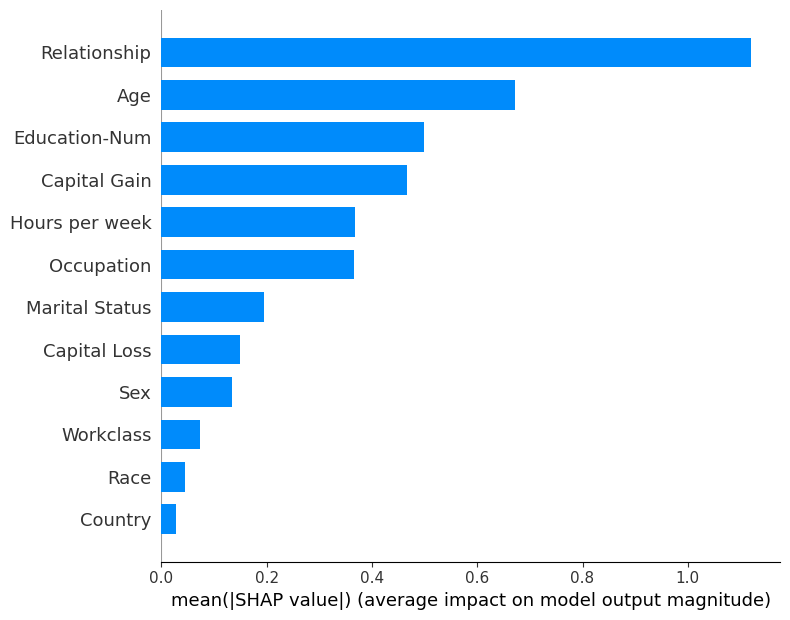

In [16]:
shap.summary_plot(shap_values, X_display, plot_type = "bar")

In [ ]:
# Relationship is important because when we have families
#or responsabilities we tend the have more

In [21]:
print(X_test.Relationship)

18329    1
997      1
13225    4
6837     0
29132    4
        ..
23959    3
30638    4
6640     3
19186    3
2522     4
Name: Relationship, Length: 6513, dtype: int64


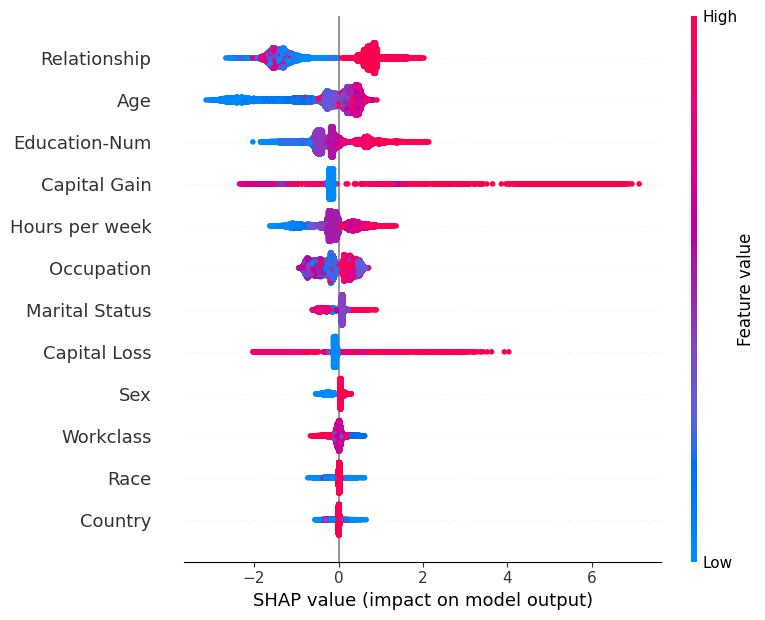

In [17]:
shap.summary_plot(shap_values,X)

In [22]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:],X_display.iloc[0,:])